In [1]:
import pathlib
from skimage.io import imread, imsave, imshow
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline
# process xml file
import xml.etree.ElementTree

In [2]:
# Glob the training data and load a single image path
training_img_paths = pathlib.Path('../../').glob('*/images_png_small/*.png')
training_img_sorted = sorted([x for x in training_img_paths])

# mask and xml files
training_mask_paths = pathlib.Path('../../').glob('*/pix_annotations_png_small/*.png')
training_mask_sorted = sorted([x for x in training_mask_paths])

training_xml_paths = pathlib.Path('../../').glob('*/xml_annotations_small/*.xml')
training_xml_sorted = sorted([x for x in training_xml_paths])

im_path = training_img_sorted[0]
mask_path = training_mask_sorted[0]
xml_path = training_xml_sorted[0]
print(im_path)
print(len(training_img_sorted))
print(mask_path)
print(xml_path)
im = imread(str(im_path))
mask = imread(str(mask_path))
root = xml.etree.ElementTree.parse(str(xml_path)).getroot()
size = root.findall('size')
width = float(size[0][0].text)
height = float(size[0][1].text)

..\..\Mask_RCNN\images_png_small\lg-1100321-aug-beethoven--page-48.png
2
..\..\Mask_RCNN\pix_annotations_png_small\lg-1100321-aug-beethoven--page-42.png
..\..\Mask_RCNN\xml_annotations_small\lg-1100321-aug-beethoven--page-42.xml


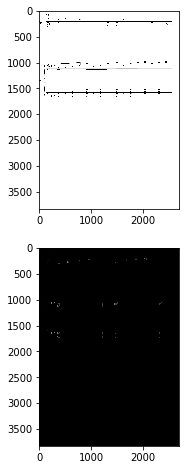

In [3]:
# show the image and mask to check they are consistent
plt.figure(figsize = (6, 8))
plt.subplot(211)
plt.imshow(im)

plt.subplot(212)
plt.imshow(mask, cmap = 'gray')

In [4]:
# process xml file
import xml.etree.ElementTree

In [5]:
# get the information of all symbols in one image
def get_symbol_info(xml_path):
    root = xml.etree.ElementTree.parse(str(xml_path)).getroot()
    size = root.findall('size')
    width = float(size[0][0].text)
    height = float(size[0][1].text)

    symbols = []
    symbol_names = set() # use a set to store unique symbol names
    rectangles = []

    # get the bounding box for each object, multiply with its width and height to get the real pixel coords
    for symbol in root.findall('object'):
        name = symbol.find('name').text
        xmin = round(float(symbol.find('bndbox')[0].text)*width)
        xmax = round(float(symbol.find('bndbox')[1].text)*width)
        ymin = round(float(symbol.find('bndbox')[2].text)*height)
        ymax = round(float(symbol.find('bndbox')[3].text)*height)

        current_rectangle = name, (xmin, ymin), xmax - xmin, ymax - ymin
        current_symbol = name, xmin, xmax, ymin, ymax, height, width
        rectangles.append(current_rectangle)
        symbols.append(current_symbol)
        symbol_names.add(name)
    return symbols, symbol_names, rectangles

There are 58 symbols in the score


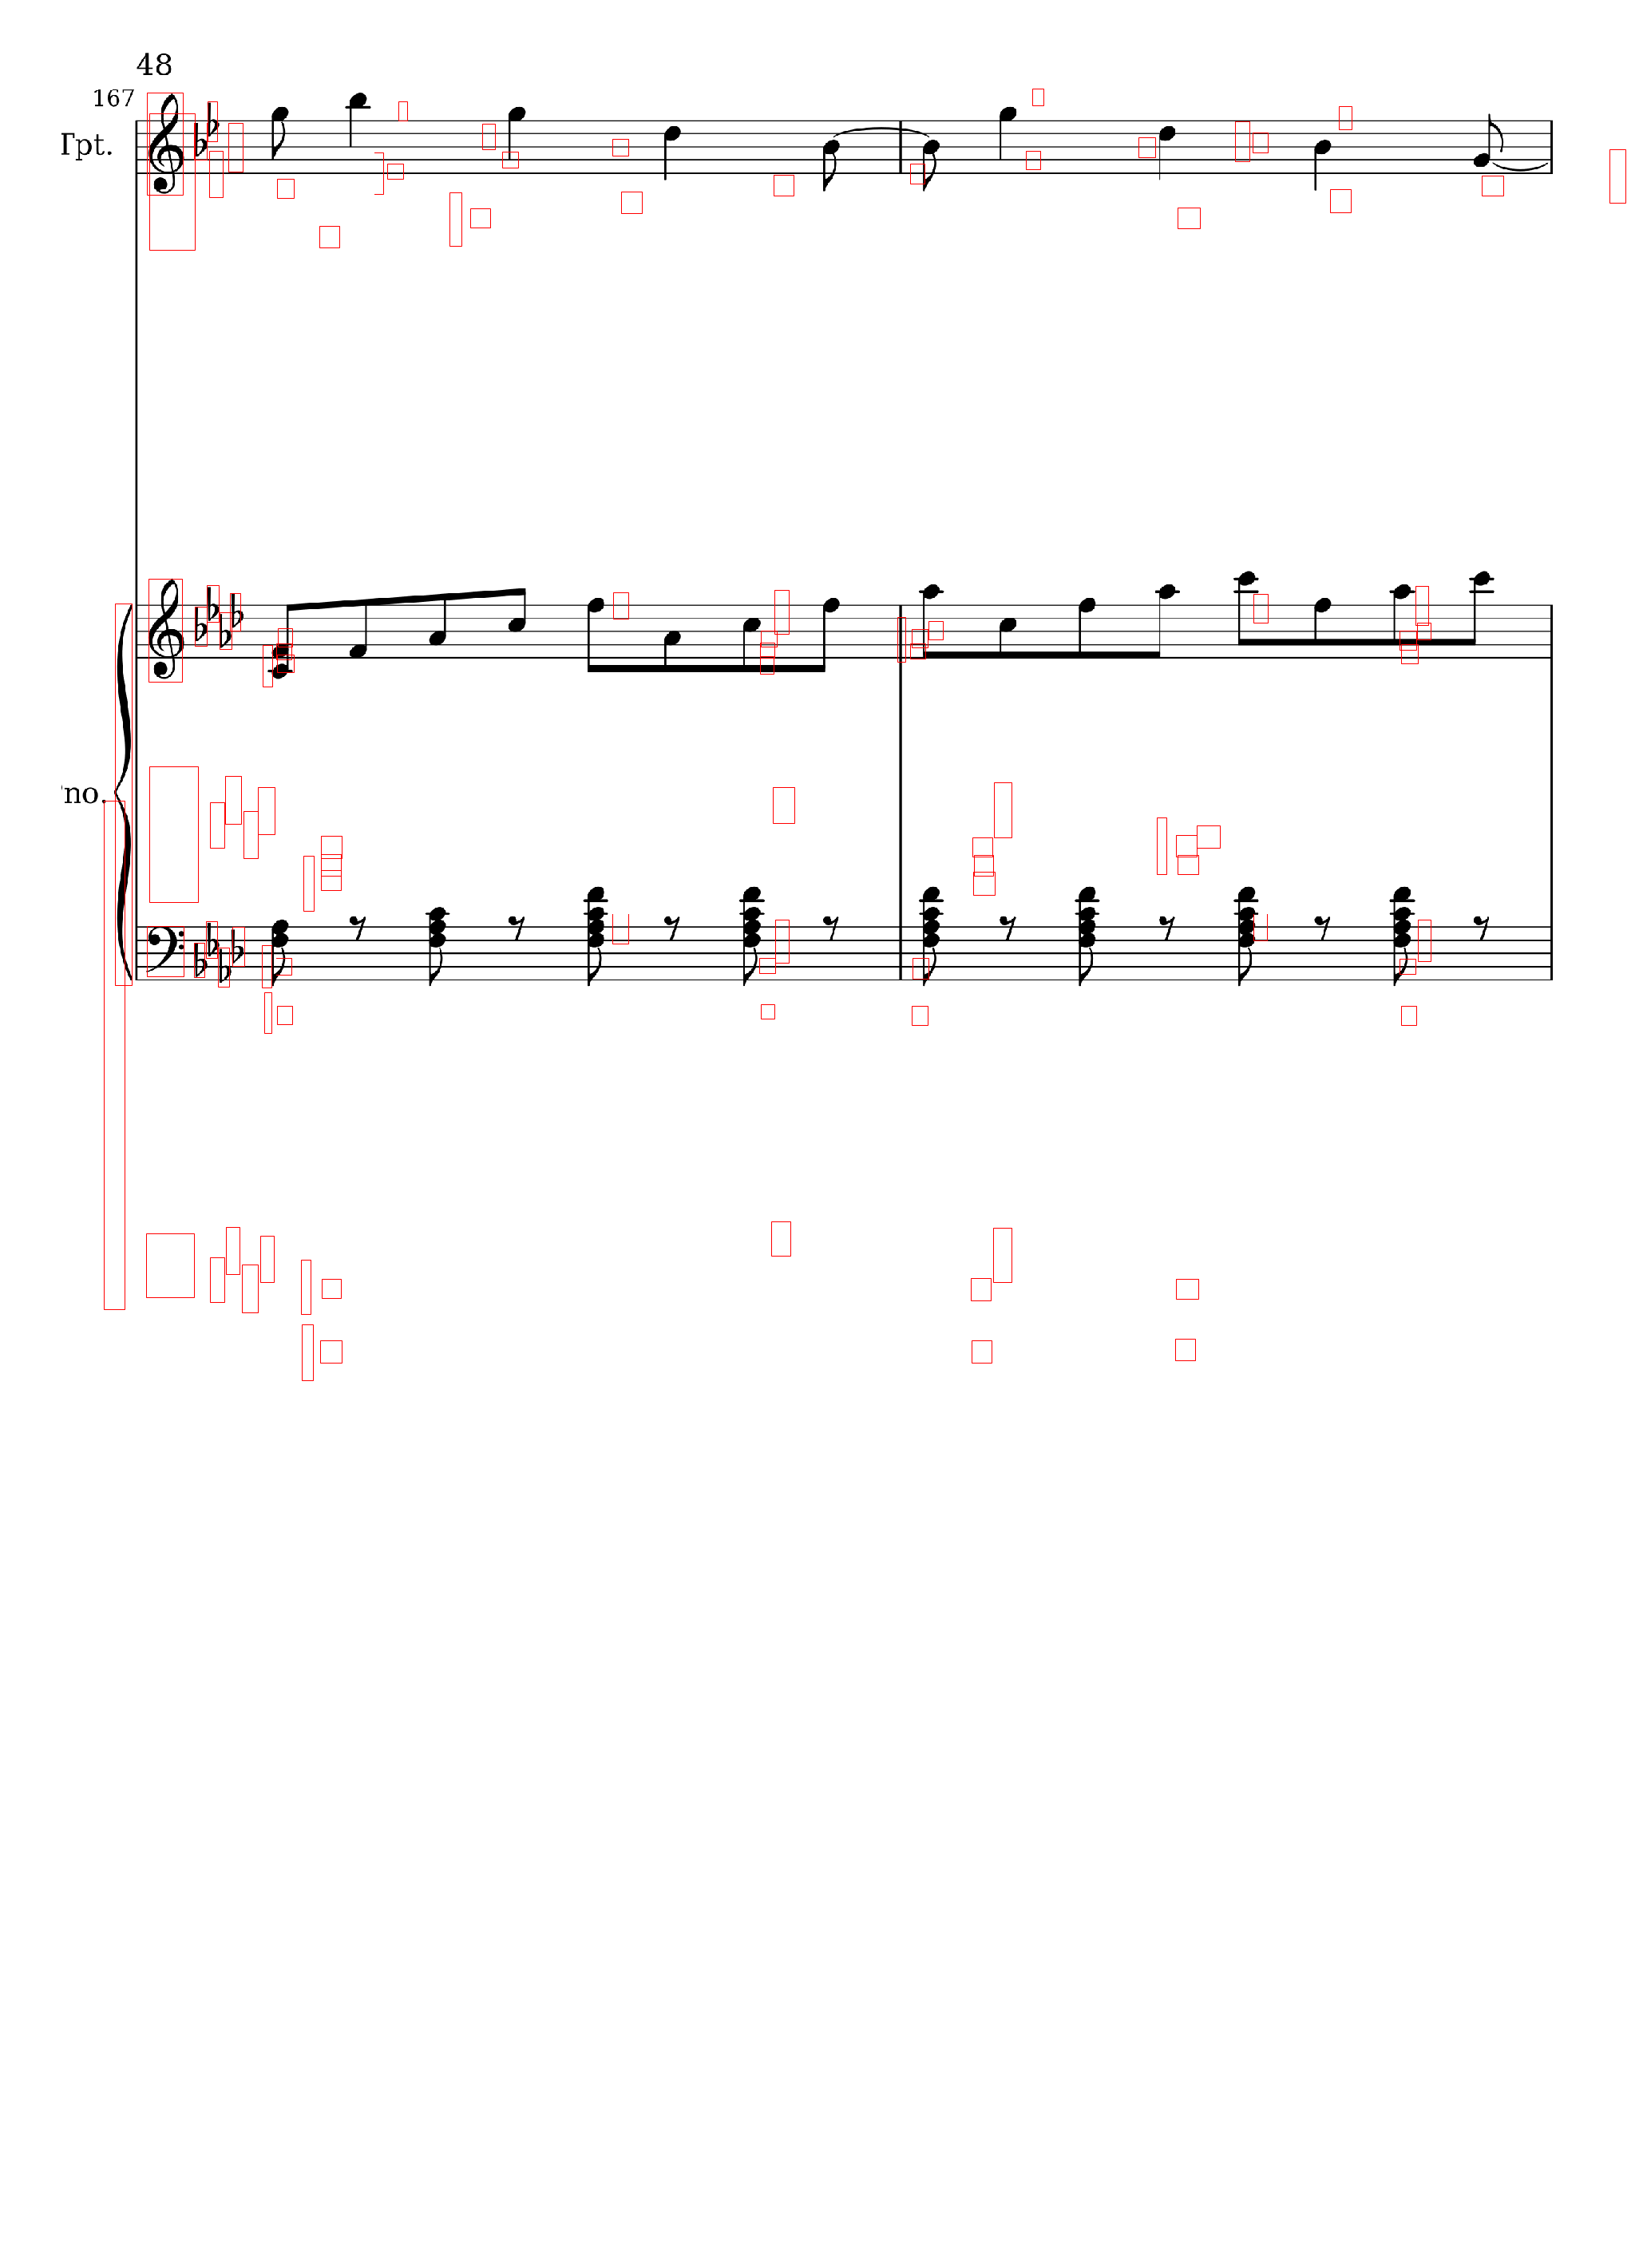

In [119]:
# draw the bounding box to make sure the coordinates extracted are correct
# Create figure and axes
# fig, ax = plt.figure(figsize = (12, 20))
fig,ax = plt.subplots(figsize = (36, 60))

symbols, symbol_names, rectangles = get_symbol_info(xml_path)

# Display the image
ax.imshow(im)
print('There are %d symbols in the score' % len(rectangles))
for rectan in rectangles:
    # Create a Rectangle patch
    rect = patches.Rectangle(rectan[1]-np.random.randint(5, size = 2),rectan[2] - np.random.randint(5),rectan[3] + np.random.randint(5),linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.axis('off')
plt.show()
fig.savefig('random_crop.png', bbox_inches='tight')

(2875, 2058, 4)
1007 50


C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


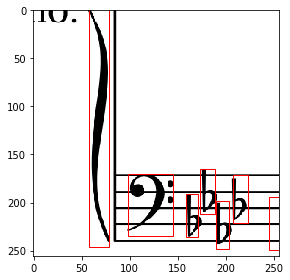

In [117]:
im = imread('random_crop.png', as_gray=True)
print(im.shape)
x, y = np.random.randint(1500, size = 2)
print(x, y)

crop = im[x:x+256, y:y+256, :]
imshow(crop)

In [118]:
imsave('crop2.png', crop)